<a href="https://colab.research.google.com/github/cemlus/Cognitive-Computing/blob/main/Assignment_10_102316117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Siddhant (102316117) -> Assignment 10**

Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuation using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribuƟon (excluding stopwords).


In [4]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt_tab')
nltk.download('stopwords')

para = """Entrepreneurship is vital for students as it cultivates essential skills like creativity, problem-solving, and resilience by challenging them to innovate and adapt in real-world scenarios. It fosters leadership, financial literacy, and initiative, empowering students to transform ideas into action. These competencies not only enhance academic and personal growth but also prepare them for a dynamic job market, where adaptability and self-reliance are prized. Whether launching a venture or entering traditional careers, entrepreneurial thinking equips students with a competitive edge, driving both professional success and societal progress."""

# 1. Lowercase and remove punctuation
cleanedText = re.sub(r'[^\w\s]', '', para.lower())
print("Cleaned Text:", cleanedText)

# 2. Tokenize sentences and words
sent_tokens = sent_tokenize(para)
wordTokensNltk = word_tokenize(cleanedText)
wordTokensSplit = cleanedText.split()

# 3. Compare split() vs word_tokenize()
print("Split():", wordTokensSplit)
print("word_tokenize():", wordTokensNltk)

# 4. Remove stopwords
stopWords = set(stopwords.words('english'))
filteredWords = [word for word in wordTokensNltk if word not in stopWords]
print("Filtered Words:", filteredWords)

# 5. Word Frequency Distribution
freqDist = Counter(filteredWords)
print("Word Frequency:", freqDist)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cleaned Text: entrepreneurship is vital for students as it cultivates essential skills like creativity problemsolving and resilience by challenging them to innovate and adapt in realworld scenarios it fosters leadership financial literacy and initiative empowering students to transform ideas into action these competencies not only enhance academic and personal growth but also prepare them for a dynamic job market where adaptability and selfreliance are prized whether launching a venture or entering traditional careers entrepreneurial thinking equips students with a competitive edge driving both professional success and societal progress
Split(): ['entrepreneurship', 'is', 'vital', 'for', 'students', 'as', 'it', 'cultivates', 'essential', 'skills', 'like', 'creativity', 'problemsolving', 'and', 'resilience', 'by', 'challenging', 'them', 'to', 'innovate', 'and', 'adapt', 'in', 'realworld', 'scenarios', 'it', 'fosters', 'leadership', 'financial', 'literacy', 'and', 'initiative', 'empoweri

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmatization with WordNetLemmatizer
5. Compare the stemmed and lemmatized outputs and explain when you’d prefer one over
the other.

In [5]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# 1. Extract alphabet-only words
words_alpha = re.findall(r'\b[a-zA-Z]+\b', cleanedText)

# 2. Remove stopwords again
filteredAlpha = [word for word in words_alpha if word not in stopWords]

# 3. Stemming
stemmer = PorterStemmer()
stemmedWords = [stemmer.stem(word) for word in filteredAlpha]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatizedWords = [lemmatizer.lemmatize(word) for word in filteredAlpha]

# 5. Comparison
print("Stemmed:", stemmedWords)
print("Lemmatized:", lemmatizedWords)


[nltk_data] Downloading package wordnet to /root/nltk_data...


Stemmed: ['entrepreneurship', 'vital', 'student', 'cultiv', 'essenti', 'skill', 'like', 'creativ', 'problemsolv', 'resili', 'challeng', 'innov', 'adapt', 'realworld', 'scenario', 'foster', 'leadership', 'financi', 'literaci', 'initi', 'empow', 'student', 'transform', 'idea', 'action', 'compet', 'enhanc', 'academ', 'person', 'growth', 'also', 'prepar', 'dynam', 'job', 'market', 'adapt', 'selfreli', 'prize', 'whether', 'launch', 'ventur', 'enter', 'tradit', 'career', 'entrepreneuri', 'think', 'equip', 'student', 'competit', 'edg', 'drive', 'profession', 'success', 'societ', 'progress']
Lemmatized: ['entrepreneurship', 'vital', 'student', 'cultivates', 'essential', 'skill', 'like', 'creativity', 'problemsolving', 'resilience', 'challenging', 'innovate', 'adapt', 'realworld', 'scenario', 'foster', 'leadership', 'financial', 'literacy', 'initiative', 'empowering', 'student', 'transform', 'idea', 'action', 'competency', 'enhance', 'academic', 'personal', 'growth', 'also', 'prepare', 'dynamic

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representaƟon.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np

# Step 1: Sample short texts
texts = [
    "Stock markets hit record highs amid tech rally.",
    "Worth every penny—this blender crushes ice effortlessly",
    "The movie had stunning visuals but the storyline was weak."
]

# Step 2: Bag of Words using CountVectorizer
cv = CountVectorizer()
bow = cv.fit_transform(texts)
bow_df = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names_out())
print("Bag of Words Representation:\n")
print(bow_df)
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Step 3: TF-IDF using TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print("\nTF-IDF Matrix:\n")
print(tfidf_df)

print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Step 4: Top 3 keywords per text using TF-IDF
print("\nTop 3 Keywords from Each Text:")
for i in range(len(texts)):
    row = tfidf_df.iloc[i]
    top_keywords = row.sort_values(ascending=False).head(3)
    print(f"\nText {i+1}: {texts[i]}")
    print("Top Keywords:", list(top_keywords.index))


Bag of Words Representation:

   amid  blender  but  crushes  effortlessly  every  had  highs  hit  ice  \
0     1        0    0        0             0      0    0      1    1    0   
1     0        1    0        1             1      1    0      0    0    1   
2     0        0    1        0             0      0    1      0    0    0   

   ...  stock  storyline  stunning  tech  the  this  visuals  was  weak  worth  
0  ...      1          0         0     1    0     0        0    0     0      0  
1  ...      0          0         0     0    0     1        0    0     0      1  
2  ...      0          1         1     0    2     0        1    1     1      0  

[3 rows x 25 columns]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

TF-IDF Matrix:

       amid   blender       but   crushes  effortlessly     every       had  \
0  0.353553  0.0000

Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
a. Jaccard Similarity using sets
b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
c. Analyze which similarity metric gives beƩer insights in your case.


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

text1 = """Artificial Intelligence (AI) is the simulation of human intelligence processes by machines.
It enables computers to learn from data, recognize patterns, and make decisions.
From self-driving cars to virtual assistants, AI is transforming industries.
Yet, ethical considerations—like bias and job displacement—remain critical"""

text2 = """Blockchain is a distributed ledger that records transactions in a secure, immutable way.
It uses cryptographic hashes and consensus protocols to prevent tampering.
Beyond cryptocurrencies, blockchain promises transparent supply chains and smart contracts.
Scalability and energy consumption, however, are ongoing challenges."""

import re

# Lowercase and define a regex tokenizer that:
#  - keeps hyphenated words together
#  - keeps decimal numbers intact
#  - treats other alphanumeric runs as tokens
token_pattern = r"\b\d+\.\d+\b|\b[a-zA-Z0-9]+(?:-[a-zA-Z0-9]+)*\b"

def tokenize(text):
    text = text.lower()
    return re.findall(token_pattern, text)

tokens1 = tokenize(text1)
tokens2 = tokenize(text2)

#jacardi similarity
set1, set2 = set(tokens1), set(tokens2)
jaccard = len(set1 & set2) / len(set1 | set2)
print(f"Jaccard Similarity: {jaccard:.3f}")

#Cosine Similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(token_pattern=token_pattern)
tfidf_matrix = vectorizer.fit_transform([text1, text2])

cos_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
print(f"Cosine Similarity (TF-IDF): {cos_sim:.3f}")


Jaccard Similarity: 0.056
Cosine Similarity (TF-IDF): 0.118


Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjectivity for each review.
2. Classify reviews into Positive / Negative / Neutral.
3. Create a word cloud using the wordcloud library for all positive reviews.


Polarity: 0.40
Subjectivity: 0.62
Sentiment: Positive


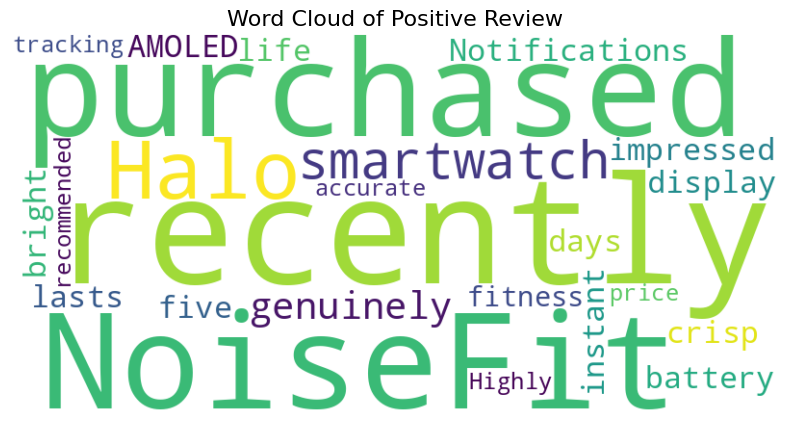

In [15]:
# Install required packages
!pip install -q textblob wordcloud
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Sample product/service review
review = """
I recently purchased the NoiseFit Halo smartwatch and I'm genuinely impressed.
The battery life lasts more than five days, and the AMOLED display is bright and crisp.
Notifications are instant, and fitness tracking is very accurate.
Highly recommended for the price!
"""

# 2. Analyze sentiment using TextBlob
blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# 3. Classify based on polarity
if polarity > 0.1:
    sentiment = "Positive"
elif polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Polarity: {polarity:.2f}")
print(f"Subjectivity: {subjectivity:.2f}")
print(f"Sentiment: {sentiment}")

# 4. Word Cloud for Positive review
if sentiment == "Positive":
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Positive Review", fontsize=16)
    plt.show()


Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starƟng from any seed word you
provide.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

!pip install -q tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# Sample text data
text = """
Technology is evolving at a rapid pace. Artificial intelligence, blockchain, and the Internet of Things are reshaping the way we live and work.
Automation is reducing the need for repetitive tasks, while smart devices are improving communication and productivity.
As digital transformation continues, the importance of cybersecurity, data privacy, and ethical innovation grows significantly.
Future advancements in quantum computing and neural networks promise breakthroughs we can only begin to imagine.
"""

# Step 1: Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Step 2: Create input sequences
input_sequences = []
words = text.lower().split()
for i in range(2, len(words)):
    n_gram_sequence = words[:i]
    token_list = tokenizer.texts_to_sequences([' '.join(n_gram_sequence)])[0]
    if len(token_list) > 1:
        input_sequences.append(token_list)

# Step 3: Pad sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Step 4: Split predictors and label
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]
ys = to_categorical(labels, num_classes=total_words)

# Step 5: Build the LSTM model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(xs, ys, epochs=500, verbose=0)  # Lower epochs for quicker training in demo

# Step 6: Text generation function
def generate_text(seed_text):
    for _ in range(10):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += ' ' + output_word
    return seed_text

# Step 7: Generate text from a seed
seed = "artificial"
print("\nGenerated Text:\n")
print(generate_text(seed))


Generated Text: ai is is is is is